In [10]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score,make_scorer
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [12]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1] #vrai positifs 
    tn=cm[0][0] #vrai negatifs
    fp=cm[0][1] #faux positifs
    fn=cm[1][0] #faux negatifs
    score=(2*((tp+tn)/y_test.size) + 5*(tp/(fn+tp)))/7 #(2*accuracy + 5*rappel)/7
#     print(f"score : {score} soit {score* 100:.2f}%")
    return float(score)

In [13]:
def random_forest_classifier(X_tr,y_tr,X_ts,y_ts):
    #50 arbres de décision 
    rf_classifier = RandomForestClassifier(n_estimators=50)
    rf_classifier.fit(X_tr, y_tr)
    y_pred = rf_classifier.predict(X_test)
    #performances
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print('metrique personnalisée (MP): {}'.format(metric(y_ts,y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()

------------------------------ Fôret Aléatoire ,Random Forest ------------------------------
Precision : 0.92857
Recall : 0.77228
F1 : 0.84324
roc_auc_score : 0.88609
metrique personnalisée (MP): 0.8371954165627279
\\Matrice de confusion ///:- 
 [[56855     6]
 [   23    78]]


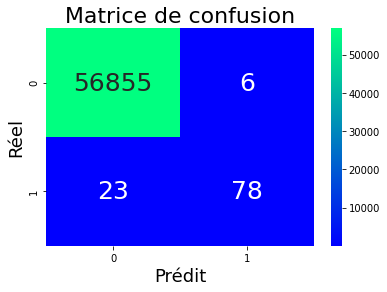

In [14]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
colonnes_X=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

colonnes_Y=['Class']
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))

x = df.drop('Class', axis=1) #données
y = df['Class'] #classe

#découpage du dataset 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#RF
print("-"*30,"Fôret Aléatoire ,Random Forest",30*"-")
random_forest_classifier(X_train,Y_train,X_test,Y_test)
